In [13]:
from feature_matching.lightglue_matcher import get_SIFT_features, get_DISK_features, match_features, match_features_for_plots
from pprint import pprint


feats0 = get_SIFT_features('data/train/imc2023_haiper/fountain_image_116.png')
feats1 = get_SIFT_features('data/train/imc2023_haiper/fountain_image_199.png')
#points0, points1 = match_features(image0_features=feats0, image1_features=feats1, descriptor='sift')
print(feats0['scales'].shape)
points0, points1, matches01 = match_features_for_plots(image0_features=feats0, image1_features=feats1, descriptor='sift')

print(points0.shape)


torch.Size([1, 1615])
torch.Size([33, 2])


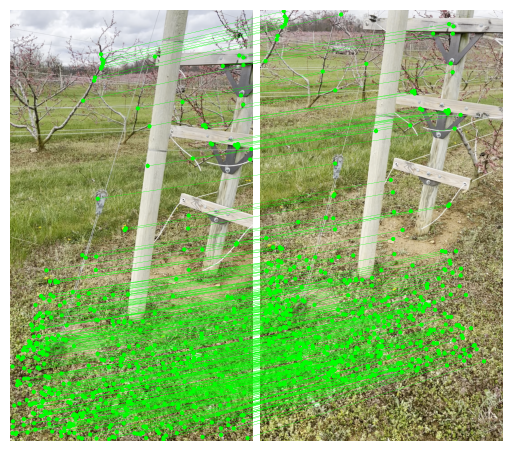

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv
from feature_matching.LightGlue.lightglue import viz2d
from feature_matching.LightGlue.lightglue.utils import numpy_image_to_torch, rbd


    

    

def load_img(file, size, interpolation):
    img = cv.imread(file)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, size, interpolation=interpolation)
    return img


imgA = '.\\data\\train\\amy_gardens\\peach_0004.png'
imgB = '.\\data\\train\\amy_gardens\\peach_0008.png'
imgA = load_img(imgA, size=(576, 1024), interpolation=cv.INTER_AREA)
imgB = load_img(imgB, size=(576, 1024), interpolation=cv.INTER_AREA)


imgL = numpy_image_to_torch(imgA)
imgR = numpy_image_to_torch(imgB)
#img = cv.drawMatchesKnn(img1=imgL,keypoints1=feats0['keypoints'],img2=imgR,keypoints2=feats1['keypoints'],matches1to2=points,outImg=None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#plt.imshow(img)
#plt.show()

matches01 = points[2]
kpts0 = feats0["keypoints"]
kpts1 = feats1["keypoints"]
matches = points  # indices with shape (K,2)
points0 = points[0]  # coordinates in img0, shape (K,2)
points1 = points[1]  # coordinates in img1, shape (K,2)

axes = viz2d.plot_images([imgL, imgR])
viz2d.plot_matches(points0, points1, color='lime', lw=0.2)

#kpc0, kpc1 = viz2d.cm_prune(matches01['prune0']), viz2d.cm_prune(matches01['prune1'])
#viz2d.plot_images([imgL, imgR])
#viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=10)

#import matplotlib.image as mpimg
#f, axarr = plt.subplots(1,2)
#imgL = mpimg.imread(imgA)
#imgR = mpimg.imread(imgB)
#axarr[0].imshow(imgL)
#axarr[0].axis('off')
#axarr[1].imshow(imgR)
#axarr[1].axis('off')
#plt.show()

In [3]:
feats0 = get_DISK_features('.\\data\\train\\amy_gardens\\peach_0004.png')
feats1 = get_DISK_features('.\\data\\train\\amy_gardens\\peach_0008.png')
points = match_features_for_plots(image0_features=feats0, image1_features=feats1, descriptor='disk')

print(len(points0))
print(len(points1))

410
410


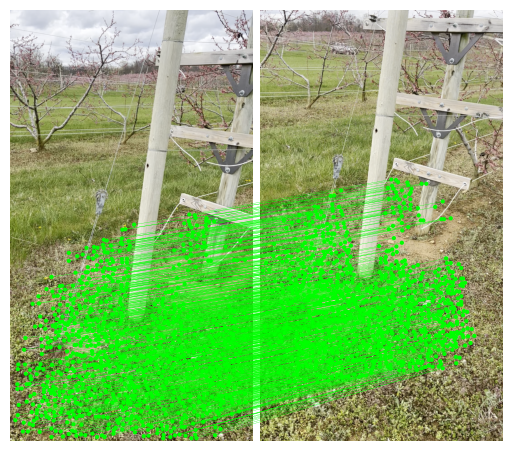

In [4]:
matches01 = points[2]
kpts0 = feats0["keypoints"]
kpts1 = feats1["keypoints"]
matches = points  # indices with shape (K,2)
points0 = points[0]  # coordinates in img0, shape (K,2)
points1 = points[1]  # coordinates in img1, shape (K,2)

axes = viz2d.plot_images([imgL, imgR])
viz2d.plot_matches(points0, points1, color='lime', lw=0.2)